In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
#import nxviz as nv

In [146]:
from mpl_toolkits.basemap import Basemap as Basemap
#%matplotlib qt

import geopandas as gpd

In [3]:
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

In [4]:
# bottom left corner = 18th and H
# top right corner = 17th and I
latitude_bounds = [38.900155, 38.901414] # southern and northern boundaries
longitude_bounds = [-77.041794, -77.039347] # western and easter boundaries

In [5]:
df_inter = pd.read_csv('Intersection_points.csv')
df_segment = pd.read_csv('Street_segments.csv')

In [6]:
print(df_inter.shape,'\n', df_segment.shape)

(18276, 26) 
 (13676, 21)


In [224]:
df_inter.head()

,STREET1ID,STREET2ID,ST1NAME,ST2NAME,STREET1SEGID,STREET2SEGID,NODEID,LATITUDE,LONGITUDE
0,206968,203198,PEABODY,EASTERN,3901,2784,18153,38.962638,-76.998541
1,200582,203198,58TH,EASTERN,5136,8701,18902,38.898918,-76.917117
2,208911,203198,VARNUM,EASTERN,7826,9123,20113,38.943011,-76.973987
3,203562,203198,FIELD,EASTERN,3394,4433,15609,38.897987,-76.915931
4,203679,203198,FOOTE,EASTERN,7962,7307,17686,38.897204,-76.914930


In [8]:
df_segment.head()

,STREETSEGID,FACILITYID,SOURCEID,STREETID,REGISTEREDNAME,STREETTYPE,QUADRANT,DIRECTIONALITY,SEGMENTTYPE,FROMNODEID,TONODEID,FROMADDRESSLEFTTHEO,TOADDRESSLEFTTHEO,FROMADDRESSRIGHTTHEO,TOADDRESSRIGHTTHEO,BEGINMEASURE,ENDMEASURE,UPDATETIMESTAMP,OBJECTID_1,OBJECTID,SHAPELEN
0,7581,SEGID-7581,10180320,100180,18TH,ST,NW,2,2,21821,21704,3100.0,3154.0,3101.0,3155.0,0,97.487740,2005-11-01T12:55:47.000Z,2546788,2684322,97.487740
1,5497,SEGID-5497,10180330,100180,18TH,ST,NW,2,2,21704,21810,3156.0,3198.0,3157.0,3199.0,0,97.562354,2005-11-01T12:55:47.000Z,2546789,2684323,97.562354
2,8038,SEGID-8038,10180340,100180,18TH,ST,NW,2,2,21810,18209,3200.0,3298.0,3201.0,3299.0,0,101.945998,2005-11-01T12:55:47.000Z,2546790,2684324,101.946006
3,588,SEGID-588,10180350,100180,18TH,ST,NW,2,2,18209,21785,3300.0,3334.0,3301.0,3335.0,0,101.815721,2005-11-01T12:55:47.000Z,2546791,2684325,101.815713
4,9760,SEGID-9760,10180360,100180,18TH,ST,NW,2,2,21785,15677,3336.0,3398.0,3337.0,3399.0,0,97.960598,2005-11-01T12:55:47.000Z,2546792,2684326,97.960628


In [9]:
df_inter.columns

Index(['X', 'Y', 'OBJECTID', 'MARID', 'INTERSECTIONID', 'STREET1ID',
       'STREET2ID', 'ST1NAME', 'ST1TYPE', 'ST1QUAD', 'FULLSTREET1DISPLAY',
       'ST2NAME', 'ST2TYPE', 'ST2QUAD', 'FULLSTREET2DISPLAY',
       'FULLINTERSECTION', 'REFX', 'REFY', 'NATIONALGRID', 'STREET1SEGID',
       'STREET2SEGID', 'NODEID', 'INTERSECTION_TYPE', 'SOURCE', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [10]:
df_segment.columns

Index(['STREETSEGID', 'FACILITYID', 'SOURCEID', 'STREETID', 'REGISTEREDNAME',
       'STREETTYPE', 'QUADRANT', 'DIRECTIONALITY', 'SEGMENTTYPE', 'FROMNODEID',
       'TONODEID', 'FROMADDRESSLEFTTHEO', 'TOADDRESSLEFTTHEO',
       'FROMADDRESSRIGHTTHEO', 'TOADDRESSRIGHTTHEO', 'BEGINMEASURE',
       'ENDMEASURE', 'UPDATETIMESTAMP', 'OBJECTID_1', 'OBJECTID', 'SHAPELEN'],
      dtype='object')

In [11]:
#Subsetting intersection points df & segments df
df_inter = df_inter.loc[:, ['STREET1ID','STREET2ID', 'ST1NAME','ST2NAME', 'STREET1SEGID','STREET2SEGID',
                            'NODEID', 'LATITUDE','LONGITUDE']]

df_segment = df_segment.loc[:, ['STREETSEGID', 'FROMNODEID','TONODEID']]

In [12]:
df_inter.dtypes

STREET1ID         int64
STREET2ID         int64
ST1NAME          object
ST2NAME          object
STREET1SEGID      int64
STREET2SEGID      int64
NODEID            int64
LATITUDE        float64
LONGITUDE       float64
dtype: object

In [13]:
#Subsetting to a small group of blocks to start things out

df_block = df_inter[ ((df_inter['LATITUDE'] >= latitude_bounds[0]) & (df_inter['LATITUDE'] <= latitude_bounds[1]))
                        & 
                     ((df_inter['LONGITUDE'] >= longitude_bounds[0]) & (df_inter['LONGITUDE'] <= longitude_bounds[1]))
                   ]

In [14]:
df_block.shape

(8, 9)

In [15]:
df_block

,STREET1ID,STREET2ID,ST1NAME,ST2NAME,STREET1SEGID,STREET2SEGID,NODEID,LATITUDE,LONGITUDE
1151,104777,100180,I,18TH,12795,398,14923,38.901337,-77.041698
4599,100180,104244,18TH,H,398,3624,14922,38.900211,-77.041700
6687,104244,100170,H,17TH,12926,1682,19852,38.900208,-77.039448
10167,104244,100180,H,18TH,3624,398,14922,38.900211,-77.041700
13060,100170,104777,17TH,I,3510,5073,17799,38.901340,-77.039447
15033,100180,104777,18TH,I,8703,5073,14923,38.901337,-77.041698
16719,104777,100170,I,17TH,5073,1682,17799,38.901340,-77.039447
18182,100170,104244,17TH,H,1682,7242,19852,38.900208,-77.039448


In [16]:
df_segment.head()

,STREETSEGID,FROMNODEID,TONODEID
0,7581,21821,21704
1,5497,21704,21810
2,8038,21810,18209
3,588,18209,21785
4,9760,21785,15677


In [17]:
#Merge 1 - get all the cases where NODEID matches with FROMNODEID

test1 = pd.merge(df_block, df_segment, left_on='NODEID', right_on='FROMNODEID', how='inner')

In [18]:
test1

,STREET1ID,STREET2ID,ST1NAME,ST2NAME,STREET1SEGID,STREET2SEGID,NODEID,LATITUDE,LONGITUDE,STREETSEGID,FROMNODEID,TONODEID
0,104777,100180,I,18TH,12795,398,14923,38.901337,-77.041698,8703,14923,18548
1,104777,100180,I,18TH,12795,398,14923,38.901337,-77.041698,12795,14923,14771
2,100180,104777,18TH,I,8703,5073,14923,38.901337,-77.041698,8703,14923,18548
3,100180,104777,18TH,I,8703,5073,14923,38.901337,-77.041698,12795,14923,14771
4,100180,104244,18TH,H,398,3624,14922,38.900211,-77.041700,398,14922,14923
5,100180,104244,18TH,H,398,3624,14922,38.900211,-77.041700,3624,14922,16233
6,104244,100180,H,18TH,3624,398,14922,38.900211,-77.041700,398,14922,14923
7,104244,100180,H,18TH,3624,398,14922,38.900211,-77.041700,3624,14922,16233
8,104244,100170,H,17TH,12926,1682,19852,38.900208,-77.039448,1682,19852,17799
9,104244,100170,H,17TH,12926,1682,19852,38.900208,-77.039448,12926,19852,14922


In [19]:
test2 = pd.merge(df_block, df_segment, left_on='NODEID', right_on='TONODEID', how='inner')

In [20]:
test2

,STREET1ID,STREET2ID,ST1NAME,ST2NAME,STREET1SEGID,STREET2SEGID,NODEID,LATITUDE,LONGITUDE,STREETSEGID,FROMNODEID,TONODEID
0,104777,100180,I,18TH,12795,398,14923,38.901337,-77.041698,398,14922,14923
1,104777,100180,I,18TH,12795,398,14923,38.901337,-77.041698,5073,17799,14923
2,100180,104777,18TH,I,8703,5073,14923,38.901337,-77.041698,398,14922,14923
3,100180,104777,18TH,I,8703,5073,14923,38.901337,-77.041698,5073,17799,14923
4,100180,104244,18TH,H,398,3624,14922,38.900211,-77.041700,7217,17414,14922
5,100180,104244,18TH,H,398,3624,14922,38.900211,-77.041700,12926,19852,14922
6,104244,100180,H,18TH,3624,398,14922,38.900211,-77.041700,7217,17414,14922
7,104244,100180,H,18TH,3624,398,14922,38.900211,-77.041700,12926,19852,14922
8,104244,100170,H,17TH,12926,1682,19852,38.900208,-77.039448,9179,16172,19852
9,104244,100170,H,17TH,12926,1682,19852,38.900208,-77.039448,7242,17804,19852


In [21]:
test2.loc[:, ['FROMNODEID', 'TONODEID']]

,FROMNODEID,TONODEID
0,14922,14923
1,17799,14923
2,14922,14923
3,17799,14923
4,17414,14922
5,19852,14922
6,17414,14922
7,19852,14922
8,16172,19852
9,17804,19852


In [22]:
test1.loc[:, ['FROMNODEID', 'TONODEID']]

,FROMNODEID,TONODEID
0,14923,18548
1,14923,14771
2,14923,18548
3,14923,14771
4,14922,14923
5,14922,16233
6,14922,14923
7,14922,16233
8,19852,17799
9,19852,14922


In [226]:
result = pd.concat([test1, test2], axis=0)

In [227]:
result.head()

,STREET1ID,STREET2ID,ST1NAME,ST2NAME,STREET1SEGID,STREET2SEGID,NODEID,LATITUDE,LONGITUDE,STREETSEGID,FROMNODEID,TONODEID
0,104777,100180,I,18TH,12795,398,14923,38.901337,-77.041698,8703,14923,18548
1,104777,100180,I,18TH,12795,398,14923,38.901337,-77.041698,12795,14923,14771
2,100180,104777,18TH,I,8703,5073,14923,38.901337,-77.041698,8703,14923,18548
3,100180,104777,18TH,I,8703,5073,14923,38.901337,-77.041698,12795,14923,14771
4,100180,104244,18TH,H,398,3624,14922,38.900211,-77.041700,398,14922,14923


In [228]:
result['ST1NAME']

0        I
1        I
2     18TH
3     18TH
4     18TH
5     18TH
6        H
7        H
8        H
9        H
10    17TH
11    17TH
12    17TH
13    17TH
14       I
15       I
0        I
1        I
2     18TH
3     18TH
4     18TH
5     18TH
6        H
7        H
8        H
9        H
10    17TH
11    17TH
12    17TH
13    17TH
14       I
15       I
Name: ST1NAME, dtype: object

In [25]:
result[result.duplicated()]

,STREET1ID,STREET2ID,ST1NAME,ST2NAME,STREET1SEGID,STREET2SEGID,NODEID,LATITUDE,LONGITUDE,STREETSEGID,FROMNODEID,TONODEID


In [26]:
result.columns

Index(['STREET1ID', 'STREET2ID', 'ST1NAME', 'ST2NAME', 'STREET1SEGID',
       'STREET2SEGID', 'NODEID', 'LATITUDE', 'LONGITUDE', 'STREETSEGID',
       'FROMNODEID', 'TONODEID'],
      dtype='object')

In [27]:
result = result.loc[:, ['NODEID', 'FROMNODEID', 'TONODEID', 'LATITUDE', 'LONGITUDE']]

In [55]:
result.head()

,NODEID,FROMNODEID,TONODEID,LATITUDE,LONGITUDE
0,14923,14923,18548,38.901337,-77.041698
1,14923,14923,14771,38.901337,-77.041698
2,14923,14923,18548,38.901337,-77.041698
3,14923,14923,14771,38.901337,-77.041698
4,14922,14922,14923,38.900211,-77.041700


In [54]:
#Below is a manual way of adding nodes and edges
#Easier to just use nx.from_pandas_edgelist(source, target, edge_att)
noders = set(result['NODEID'])
edgies = list(zip(result['FROMNODEID'], result['TONODEID']))

#Unzipping list of tuples - weird, but you have to use zip again 
one, two = zip(*edgies)

one[1:10]

(14923, 14923, 14923, 14922, 14922, 14922, 14922, 19852, 19852)

In [32]:
edgies[0]

(14923, 18548)

In [33]:
G = nx.Graph()
G.add_nodes_from(noders)
G.nodes(data=True)

In [36]:
G.add_edges_from(edgies)
nx.draw(G, with_lables=True)
plt.show()

In [42]:
result.head()

,NODEID,FROMNODEID,TONODEID,LATITUDE,LONGITUDE
0,14923,14923,18548,38.901337,-77.041698
1,14923,14923,14771,38.901337,-77.041698
2,14923,14923,18548,38.901337,-77.041698
3,14923,14923,14771,38.901337,-77.041698
4,14922,14922,14923,38.900211,-77.041700


In [45]:
J = nx.from_pandas_edgelist(result, source='FROMNODEID', target='TONODEID')

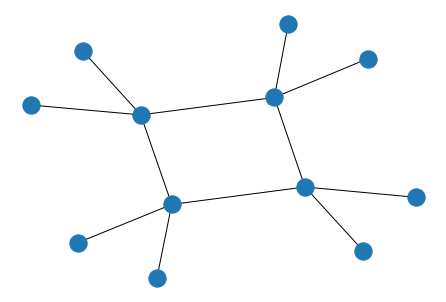

In [57]:
nx.draw(J)
plt.show()

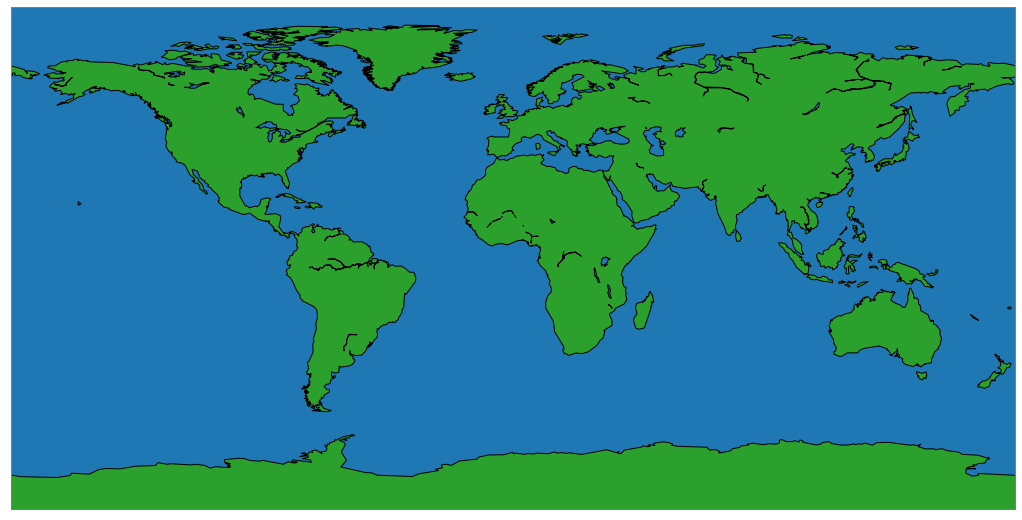

In [122]:
plt.figure(figsize=(18,20))

H = Basemap()
H.drawcoastlines()
H.drawmapboundary(color='tab:purple', fill_color='tab:blue')
H.fillcontinents(color='tab:green'
                #, lake_color='tab:Blue'
                )

plt.show()

In [206]:
# fig = plt.figure(figsize=(10,10))
# ax1 = fig.add_subplot(121)
# plt.figure(figsize=(6,10))

# J = Basemap(resolution='l', projection='merc',
#            #lat_0=38.901605, lon_0=-77.032732,
#            llcrnrlat=38.79, llcrnrlon=-77, urcrnrlon=-76.85, urcrnrlat=39,
#            #width=1E6, height=1E6
#            )

# J.drawmapboundary()
# J.drawcoastlines(color='black')
# J.drawrivers(color='blue')
# J.fillcontinents(lake_color='tab:blue')
# # J.readshapefile('Raw Data/Boundaries/Washington_DC_Boundary', 'shapes')

# plt.show()

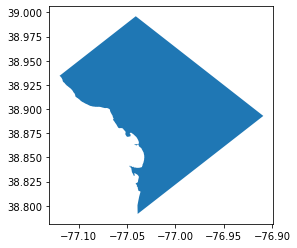

In [174]:
shapey.plot();

In [222]:
streety = gpd.read_file('Raw Data/Streets/Street_Centerlines.shp')

streety.head(20)

,OBJECTID,ROADWAYSEG,STREETSEGI,STREETID,SOURCEID,ROADTYPE,STCODE,STTYPEID,QUADCODE,ST_NAME,REGISTERED,STREETTYPE,USPS_ABBRE,ISALIAS,DESCRIPTIO,QUADRANT,DIRECTIONA,OWNERSHIP,NHSTYPE,FUNCTIONAL,FROMLEFTAD,TOLEFTADDR,FROMRIGHTA,TORIGHTADD,LEFTZIPCOD,RIGHTZIPCO,FROMLEFTTH,TOLEFTTHEO,FROMRIGHTT,TORIGHTTHE,LIFECYCLES,INSERVICED,OUTOFSERVI,UPDATETIME,OBJECTID_1,SHAPELEN,geometry
0,6324990,29076,None,None,0500519202,Alley,None,None,2,None,None,None,None,None,None,NE,Two way,DDOT,None,None,0.0,0.0,0.0,0.0,None,None,0.0,0.0,0.0,0.0,Active,2004-08-27T13:42:29.000Z,None,2004-12-14T10:56:34.000Z,0,41.375292,"LINESTRING (-76.92919281899999 38.8924826094, ..."
1,6324991,24398,None,None,0173447305,Alley,None,None,2,None,None,None,None,None,None,NE,Two way,DDOT,None,None,0.0,0.0,0.0,0.0,None,None,0.0,0.0,0.0,0.0,Active,2004-08-27T13:42:28.000Z,None,2004-12-14T10:56:36.000Z,0,96.624803,"LINESTRING (-76.98116684199999 38.9025611176, ..."
2,6324992,1297,4883,303510,33510190,Street,03510,139,3,Fendall St,FENDALL,ST,ST,F,STREET,SE,One Way (Digitizing direction),DDOT,Not NHS,Local,1956.0,1960.0,0.0,0.0,None,None,1900.0,1998.0,1901.0,1999.0,Active,2004-08-27T13:42:25.000Z,None,2004-12-14T10:56:36.000Z,0,19.224288,"LINESTRING (-76.9796279047 38.8655023225, -76...."
3,6324993,9648,3108,103861,13861050,Street,03861,139,1,G St,G,ST,ST,F,STREET,NW,Two way,DDOT,Not NHS,Collector,0.0,0.0,0.0,0.0,None,None,500.0,598.0,501.0,599.0,Active,2004-08-27T13:42:26.000Z,None,2004-12-14T10:56:35.000Z,0,40.603485,"LINESTRING (-77.01893358380001 38.8983222165, ..."
4,6324994,4116,3650,105791,15791507,Street,05791,10,1,MacArthur Blvd,MACARTHUR,BLVD,BLVD,F,BOULEVARD,NW,Two way,DDOT,Not NHS,Principal Arterial,5100.0,5142.0,5101.0,5185.0,None,None,5100.0,5198.0,5101.0,5169.0,Active,2004-08-27T13:42:26.000Z,None,2004-12-14T10:56:39.000Z,0,195.048300,"LINESTRING (-77.1014062303 38.924958382, -77.1..."
5,6324995,3911,3318,302658,32658340,Street,02658,108,3,Croffut Pl,CROFFUT,PL,PL,F,PLACE,SE,Two way,DDOT,Not NHS,Local,3410.0,3444.0,3415.0,3425.0,None,None,3400.0,3498.0,3401.0,3499.0,Active,2004-08-27T13:42:25.000Z,None,2004-12-14T10:56:36.000Z,0,125.051266,"LINESTRING (-76.9575128346 38.8868014336, -76...."
6,6324996,10141,9384,107676,17676120,Street,07676,122,1,Rock Creek Ford Rd,ROCK CREEK FORD,RD,RD,F,ROAD,NW,One Way (Digitizing direction),DDOT,Not NHS,Local,0.0,0.0,1221.0,1243.0,None,None,1250.0,1298.0,1221.0,1299.0,Active,2004-08-27T13:42:26.000Z,None,2004-12-14T10:56:38.000Z,0,105.701732,"LINESTRING (-77.0286303547 38.9617213634, -77...."
7,6324997,10354,9640,205960,25960060,Street,05960,4,2,Massachusetts Ave,MASSACHUSETTS,AVE,AVE,F,AVENUE,NE,Two way,DDOT,Not NHS,Minor Arterial,600.0,658.0,601.0,649.0,None,None,600.0,698.0,601.0,699.0,Active,2004-08-27T13:42:27.000Z,None,2004-12-14T10:56:28.000Z,0,220.598309,"LINESTRING (-76.9984524364 38.8930893835, -76...."
8,6324998,8244,474,107689,17689340,Street,07689,139,1,Rodman St,RODMAN,ST,ST,F,STREET,NW,Two way,DDOT,Not NHS,Local,0.0,0.0,3411.0,3415.0,None,None,3400.0,3498.0,3401.0,3499.0,Active,2004-08-27T13:42:26.000Z,None,2004-12-14T10:56:24.000Z,0,30.066258,"LINESTRING (-77.06816078759999 38.9390930525, ..."
9,6324999,8255,7465,107052,17052648,Street,07052,122,1,Piney Branch Rd,PINEY BRANCH,RD,RD,F,ROAD,NW,Two way,DDOT,Not NHS,Minor Arterial,0.0,0.0,0.0,0.0,None,None,6480.0,6498.0,6481.0,6499.0,Active,2004-08-27T13:42:26.000Z,None,2004-12-14T10:56:23.000Z,0,19.779245,"LINESTRING (-77.02614598380001 38.9684738155, ..."


In [213]:
streety.shape

(34061, 37)

In [229]:
# streets = ['I', '18TH', '17TH']
# streety[streety['ST_NAME'] == '18TH']

,OBJECTID,ROADWAYSEG,STREETSEGI,STREETID,SOURCEID,ROADTYPE,STCODE,STTYPEID,QUADCODE,ST_NAME,REGISTERED,STREETTYPE,USPS_ABBRE,ISALIAS,DESCRIPTIO,QUADRANT,DIRECTIONA,OWNERSHIP,NHSTYPE,FUNCTIONAL,FROMLEFTAD,TOLEFTADDR,FROMRIGHTA,TORIGHTADD,LEFTZIPCOD,RIGHTZIPCO,FROMLEFTTH,TOLEFTTHEO,FROMRIGHTT,TORIGHTTHE,LIFECYCLES,INSERVICED,OUTOFSERVI,UPDATETIME,OBJECTID_1,SHAPELEN,geometry


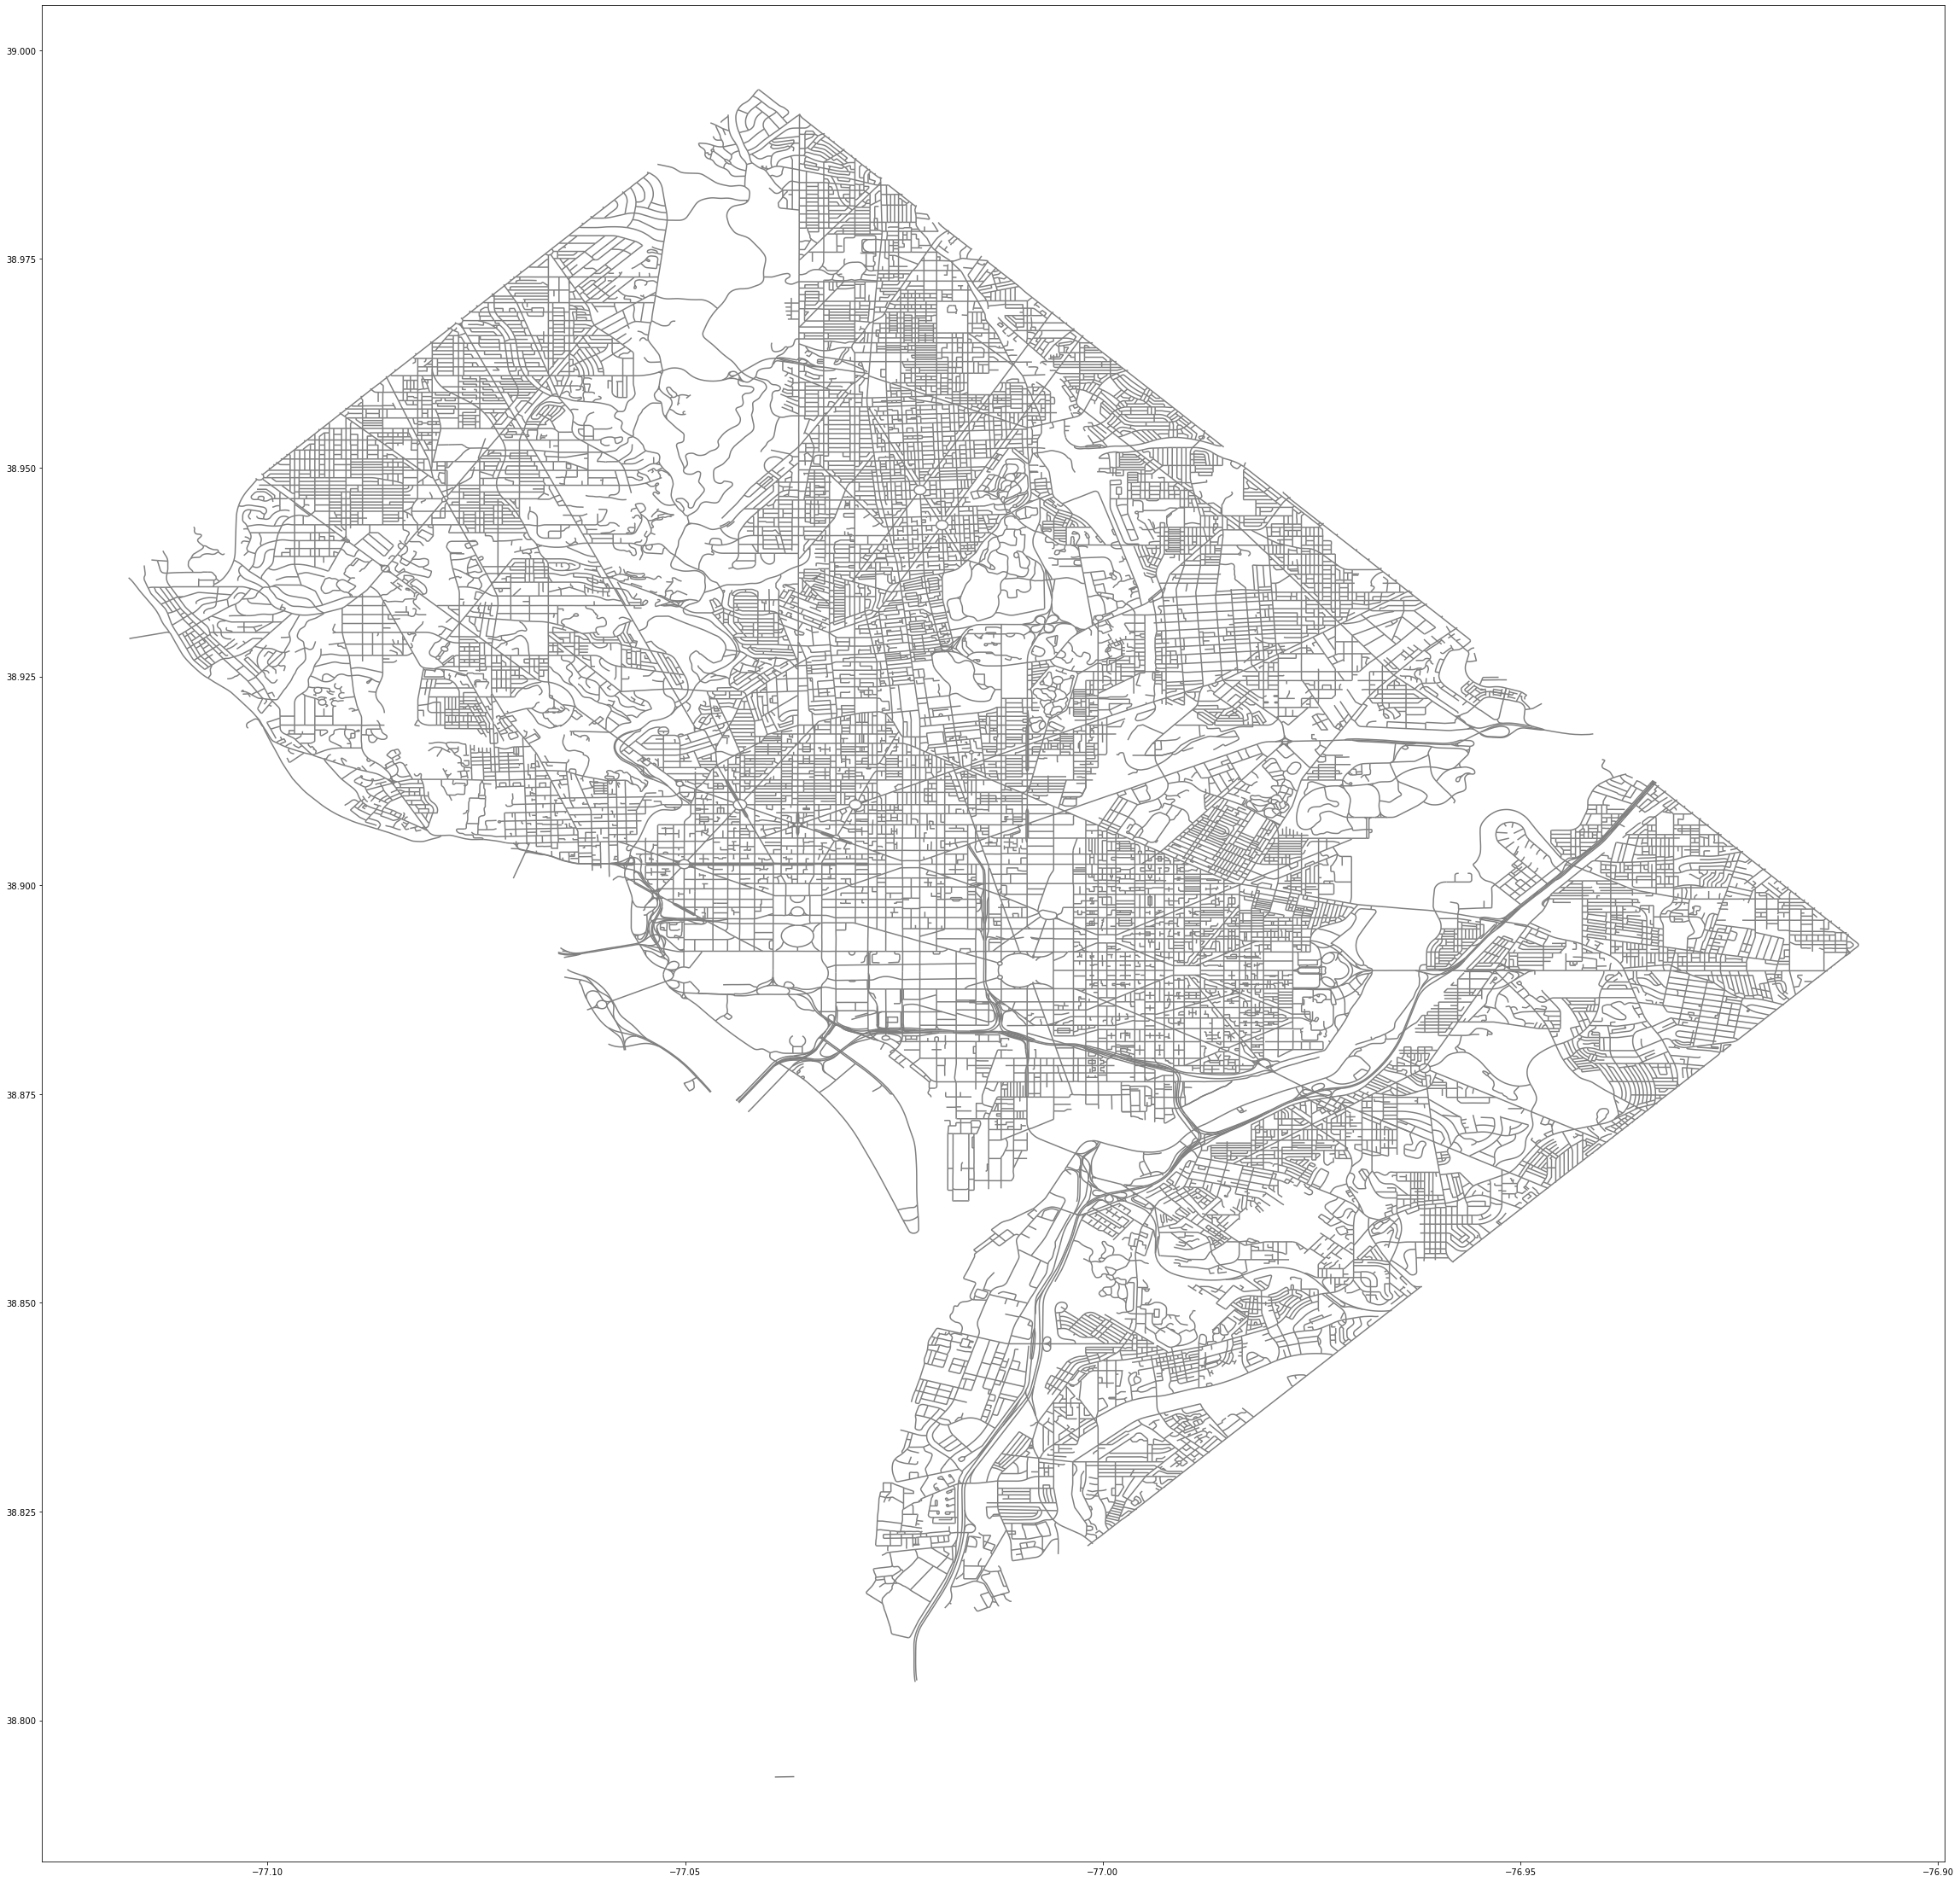

In [236]:
base = streety.plot(figsize=(60,40), color='tab:gray')

In [241]:
result.head()

,STREET1ID,STREET2ID,ST1NAME,ST2NAME,STREET1SEGID,STREET2SEGID,NODEID,LATITUDE,LONGITUDE,STREETSEGID,FROMNODEID,TONODEID
0,104777,100180,I,18TH,12795,398,14923,38.901337,-77.041698,8703,14923,18548
1,104777,100180,I,18TH,12795,398,14923,38.901337,-77.041698,12795,14923,14771
2,100180,104777,18TH,I,8703,5073,14923,38.901337,-77.041698,8703,14923,18548
3,100180,104777,18TH,I,8703,5073,14923,38.901337,-77.041698,12795,14923,14771
4,100180,104244,18TH,H,398,3624,14922,38.900211,-77.041700,398,14922,14923


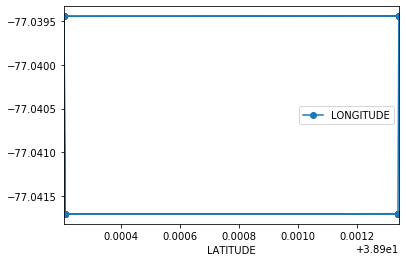

In [249]:
result.plot(x='LATITUDE', y='LONGITUDE', marker='o')
plt.show()

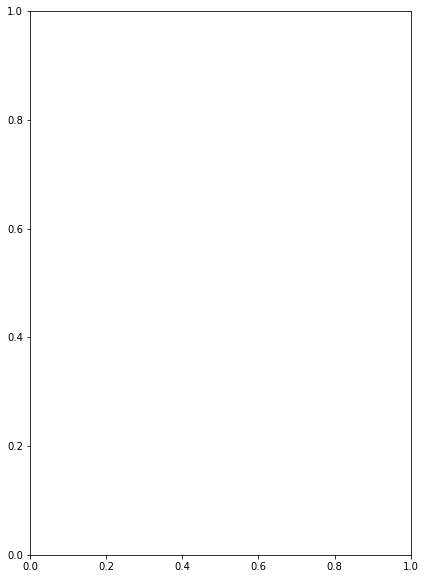

In [212]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(121)


plt.show()

In [203]:
# x,y = m(lon, lat)
# G.add_node(country)
# pos[country]=(x,y)

In [ ]:
# shapey = gpd.read_file('Raw Data/Boundaries/Washington_DC_Boundary.shp')
# shapey

In [250]:
import gmplot

In [253]:
gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)

# gmap.plot(latitudes, longitudes, 'cornflowerblue', edge_width=10)
# gmap.scatter(more_lats, more_lngs, '#3B0B39', size=40, marker=False)
# gmap.scatter(marker_lats, marker_lngs, 'k', marker=True)
# gmap.heatmap(heat_lats, heat_lngs)

gmap.draw("mymap.html")
p